# Advanced Data Mining for Business

**Group #: 1**

**Names:**

1. Bryce Rutt
2. Christian Shimabukuro
3. Getrude Shabiha
4. Katelynn Lavin
---



# Directions
In the Final Project, which will be submitted in two parts, your group will perform text analytics to solve a real-world business problem. As a group, you will choose one of the following 5 business problems and accompanying dataset.

<br>

| Business Problem (Prediction)| Topic | Data Type | Dataset Name |
| ----------- | ----------- | ----------- | ----------- |
| Rating or Sentiment|Lotion|Online reviews|lotion-reviews.csv|
| Spam Detection|         |E-mails|spam.csv|
| Rating or Recommendation | Airlines| Customer surveys| airlines.csv|
| Rating| Weight Loss Drugs|Customer surveys| weightloss.csv|
| Rating| Amazon Products| Online reviews|amazon_reviews.csv|

<br>

First, type your group number and group member names in the text cells above. You will include all prerequisite code necessary for your code in Parts 1 and 2 to run in the [Prerequisite Code](#scrollTo=1NApcFUYjX8g) Section below.

Rename this template file - <b>INFO585_Final_Group#.ipynb</b>, where # is the assignment number. As an example, Group 1's Final Project submission would be named **INFO585_Final_Group1.ipynb**.

<br>

**Overview:**

<br>

**Part 1**

**Due:** 11/26 at 11:59 PM ET

In Part 1, you will define the business problem, cleanse and preprocess the data, and perform exploratory data analysis. To complete Part 1, you will fill in the required information in the [Part 1](#scrollTo=cwyEfhMwUTT1) Section.

<br>

**Part 2**

**Due:** 12/17 at 11:59 PM ET

In Part 2, you will perform predictive analysis, evaluate your predictive models, and make recommendations and discuss your results within the context of the business problem. To complete Part 2, you will fill include all required information for Part 1 and fill in the required information in the [Part 2](#scrollTo=8fZ_eKishBVo) Section.


<hr>
<br>

# Prerequisite Code

In [ ]:
#[include any prerequisite code needed to run your code here]
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, LSTM, Conv1D, GlobalMaxPooling1D, Dropout, Activation, Input, TextVectorization, Embedding
from keras.callbacks import *
from keras.metrics import *
from keras.backend import clear_session
from keras.initializers import Constant
from google.colab import files
uploaded = files.upload()

import io
amazon = pd.read_csv(io.BytesIO(uploaded['amazon_reviews.csv']))
amazon['sentiment'] = amazon['overall'].replace({1:1, 2:1, 3:1, 4:0, 5:0})
amazon.head()

Saving amazon_reviews.csv to amazon_reviews.csv


,asin,reviewerID,reviewText,overall,summary,unixReviewTime,helpful_votes,total_votes,product_brand,product_title,product_price,sentiment
0,B00002243X,A1R089P5AS26UE,"I have an old car, Its bound to need these som...",5,Beefy,1390348800,0,0,Coleman Cable,Coleman Cable 08662 25-Feet Heavy-Duty Booster...,55.99,0
1,B00008RW9U,A24EQC4LXYPT4E,Takes the dust off my car without leaving any ...,5,What to say,1400198400,0,0,California Car Duster,California Car Duster 62442 Standard Car Duste...,23.95,0
2,B00008RW9U,A32TGXG3ZWJ4DY,This thing is great. I had another one from a ...,5,The Best,1399248000,0,0,California Car Duster,California Car Duster 62442 Standard Car Duste...,23.95,0
3,B00008RW9U,A2RO3DC31WU3LY,"As we all know, dust gets over your rides in t...",5,california duster,1401148800,0,0,California Car Duster,California Car Duster 62442 Standard Car Duste...,23.95,0
4,B00008RW9U,A1QF996642YT9L,Maybe I don't understand the finer points of k...,3,"cheaply made, picks up some dust but leaves be...",1404086400,0,0,California Car Duster,California Car Duster 62442 Standard Car Duste...,23.95,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Part 1 (50)

## Directions

Include your code and any required written information immediately under the relevant sections or prompts in the space provided.

You will submit your code and written responses in this .ipynb template notebook in the space provided under the sectioned prompts. Under the prompts there are code and/or text cells provided. If additional cells are needed, add the cells under the appropriate heading.

Your code and written responses should be easy for someone who did not write the code or perform the analysis to follow. Points will be deducted for extraneous code or if file naming instructions are not followed.

**Note:** Your Part 1 submission will only include responses for Part 1. Part 2 should remain blank or hidden in the Part 1 submission.

<br>

**Due:** 11/26 at 11:59 PM ET

**Points:** 50






## 1.1 Problem Definition & Statement (20)

**1.1 A (5) First, use the code cell below to identify your group's selected dataset and the target variable (column name) that will be used for predictive modeling.**

In [ ]:
# @title Identify Problem/Dataset

Dataset = 'amazon_reviews.csv' # @param ["lotion-reviews.csv", "spam.csv", "airlines.csv", "weightloss.csv", "amazon_reviews.csv"]
Target_Variable = 'sentiment' # @param {type:"string"}

print(Dataset)
print(Target_Variable)


amazon_reviews.csv
sentiment


**1.1 B (15) Next, use the text cell below for your problem definition and statement.**

**The problem statement should discuss the following: what is the problem and who it affects, financial/social implications of having a solution to the problem, how the model would be used in practice, and the acceptable level of model performance.**


**Business problem Identification**

In any business, it is important to get the customer feedback on a product. Accumulating feedback from multiple sources allows for further product improvement or marketing adjustments. Creating a feedback analysis model that can reliably assess customer reviews for car products is the challenge. Feedback can be categorized using such a model into positive, neutral, and negative categories. The reviews that are provided indicate that the focus is specifically on comprehending customers' experiences with car dusters and booster cables.

**Who is the target audience for such a model?**

The producers, distributors, and marketers of automotive accessories are the target market for this feedback analysis model. These parties have an interest in knowing what customers have to say to improve the quality of their products, handle possible problems, and adjust marketing strategies to suit consumer preferences.

**What are the Financial and social implications of having a model solution**

**Financial Implications:** Customer loyalty and sales can be improved by positive feedback. Promptly addressing negative sentiments can improve brand reputation and avert possible revenue loss. Any negative feedback should be treated as a threat to business revenue and a management policy should be in place.

**Social Implications:** Businesses can enhance product quality and satisfy customer expectations by better understanding customer needs, which raises customer satisfaction levels overall. In the car industry, this can promote favorable relationships and brand advocacy. In a business, your best customers are your best salesmen

**Practical use of the model in real life businesses**

A real-time business intelligence system that processes customer reviews could be integrated with the feedback analysis model. This enables companies to:

*   Constantly track and evaluate consumer opinions about a product or service.
*   Determine which particular characteristics of a product elicit favorable or negative feedback.
*   Use identified preferences to inform the implementation of targeted marketing strategies.
*   Respond promptly to consumer complaints to raise general satisfaction.

**Acceptable Level of Model Performance:**

In any prediction model, an acceptable performance level is achieved when the model minimizes false positives and false negatives and achieves a high accuracy rate in feedback classification. An accuracy rate of at least 85% would be considered acceptable performance, enabling businesses to base their decisions on trustworthy sentiment analysis.

<hr>
<br>

## 1.2 Data: Cleansing and Preprocessing (15)


**1.2 A (10) Use the code cell below (and add any additional cells, as necessary) to cleanse and preprocess the data that you will use in your analysis.**

In [ ]:
amazon.isnull().sum()

asin                 0
reviewerID           0
reviewText           0
overall              0
summary              0
unixReviewTime       0
helpful_votes        0
total_votes          0
product_brand     1586
product_title      779
product_price       66
sentiment            0
dtype: int64

In [ ]:
amazon.dropna(inplace = True)
amazon.isnull().sum()

asin              0
reviewerID        0
reviewText        0
overall           0
summary           0
unixReviewTime    0
helpful_votes     0
total_votes       0
product_brand     0
product_title     0
product_price     0
sentiment         0
dtype: int64

**1.2 B (5) In the text cell below, briefly describe and discuss (in paragraph format) the cleansing and preprocessing steps taken to prepare the data for analysis.**

The cleansing and preprocessing steps taken to prepare the data for analysis included analyzing whether or not incomplete records would affect the analysis. As you can see the code .isnull was used in order to detect missing values which is important because incomplete data can lead to biased or inaccurate results. As one can see the product brand, product title and sentiment had null values which told us there are missing volues in those categories. We correct this by removing values that contained missing values that way our analysis can provide more meaningful and nonbiased results.



---



## 1.3 Data: Description & EDA (15)





**1.3 A (8) Use the code cell below (and add any additional cells, as necessary) to describe the data and perform exploratory data analysis.**

**Description and EDA of the dataset should include: dataset overview, preview, dimensionality, visualization (text, target variable), descriptive statistics, and can include Cluster Analysis.**

In [ ]:
amazon.head()

,asin,reviewerID,reviewText,overall,summary,unixReviewTime,helpful_votes,total_votes,product_brand,product_title,product_price,sentiment
0,B00002243X,A1R089P5AS26UE,"I have an old car, Its bound to need these som...",5,Beefy,1390348800,0,0,Coleman Cable,Coleman Cable 08662 25-Feet Heavy-Duty Booster...,55.99,0
1,B00008RW9U,A24EQC4LXYPT4E,Takes the dust off my car without leaving any ...,5,What to say,1400198400,0,0,California Car Duster,California Car Duster 62442 Standard Car Duste...,23.95,0
2,B00008RW9U,A32TGXG3ZWJ4DY,This thing is great. I had another one from a ...,5,The Best,1399248000,0,0,California Car Duster,California Car Duster 62442 Standard Car Duste...,23.95,0
3,B00008RW9U,A2RO3DC31WU3LY,"As we all know, dust gets over your rides in t...",5,california duster,1401148800,0,0,California Car Duster,California Car Duster 62442 Standard Car Duste...,23.95,0
4,B00008RW9U,A1QF996642YT9L,Maybe I don't understand the finer points of k...,3,"cheaply made, picks up some dust but leaves be...",1404086400,0,0,California Car Duster,California Car Duster 62442 Standard Car Duste...,23.95,1


In [ ]:
amazon.shape

(4157, 12)

In [ ]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4157 entries, 0 to 5742
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   asin            4157 non-null   object 
 1   reviewerID      4157 non-null   object 
 2   reviewText      4157 non-null   object 
 3   overall         4157 non-null   int64  
 4   summary         4157 non-null   object 
 5   unixReviewTime  4157 non-null   int64  
 6   helpful_votes   4157 non-null   int64  
 7   total_votes     4157 non-null   int64  
 8   product_brand   4157 non-null   object 
 9   product_title   4157 non-null   object 
 10  product_price   4157 non-null   float64
 11  sentiment       4157 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 422.2+ KB


In [ ]:
amazon.describe()

,overall,unixReviewTime,helpful_votes,total_votes,product_price,sentiment
count,4157.000000,4.157000e+03,4157.000000,4157.000000,4157.000000,4157.000000
mean,4.519846,1.397260e+09,0.207121,0.284821,22.379021,0.112100
std,0.899098,4.978733e+06,0.755581,0.959323,35.334391,0.315527
min,1.000000,1.388621e+09,0.000000,0.000000,0.010000,0.000000
25%,4.000000,1.393114e+09,0.000000,0.000000,7.990000,0.000000
50%,5.000000,1.397174e+09,0.000000,0.000000,12.990000,0.000000
75%,5.000000,1.401667e+09,0.000000,0.000000,23.280000,0.000000
max,5.000000,1.405901e+09,17.000000,21.000000,975.000000,1.000000


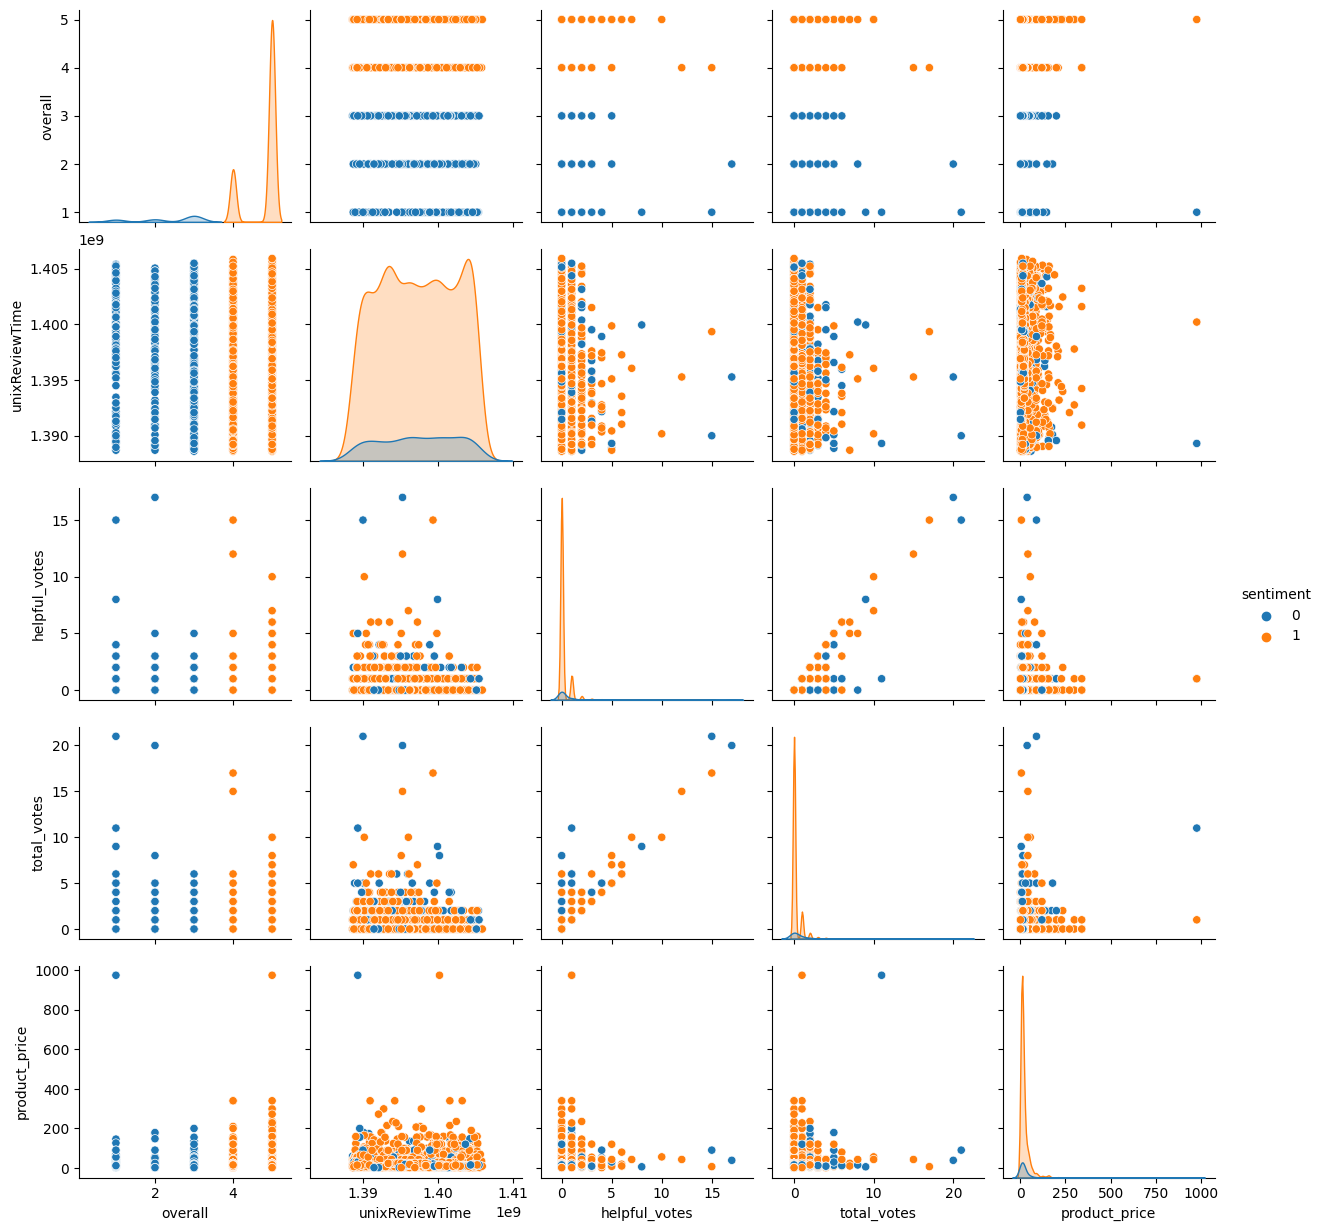

In [ ]:
sns.pairplot(amazon, hue = 'sentiment')

In [ ]:
class_distribution = amazon['sentiment'].value_counts()
print("Class Distribution:\n", class_distribution)

Class Distribution:
 0    3691
1     466
Name: sentiment, dtype: int64


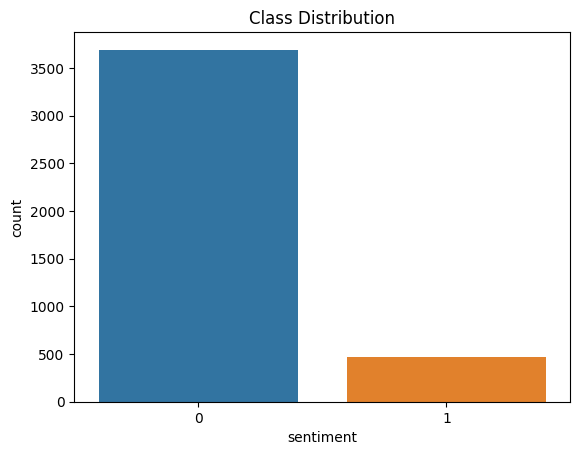

In [ ]:
sns.countplot(x='sentiment', data=amazon)
plt.title('Class Distribution')
plt.show()

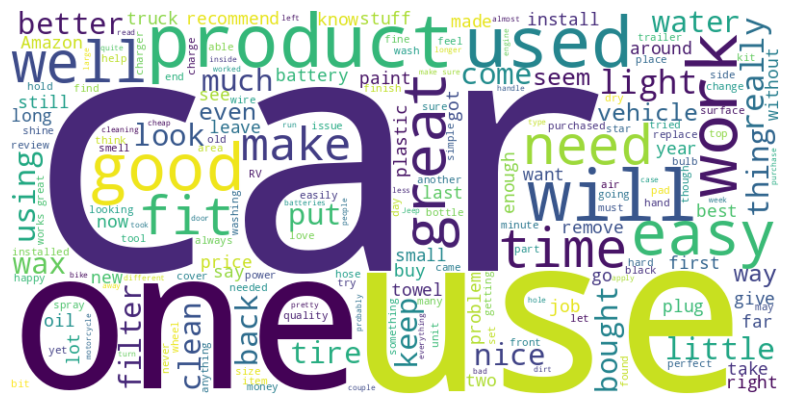

In [ ]:
text_data = ' '.join(amazon['reviewText'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(amazon['reviewText'], amazon['sentiment'], test_size=0.2, random_state=42)


In [ ]:
train_class_distribution = y_train.value_counts()
print("Training Set Class Distribution:\n", train_class_distribution)

Training Set Class Distribution:
 0    2962
1     363
Name: sentiment, dtype: int64


In [ ]:
test_class_distribution = y_test.value_counts()
print("Testing Set Class Distribution:\n", test_class_distribution)

Testing Set Class Distribution:
 0    729
1    103
Name: sentiment, dtype: int64


**1.3 B (7) In the text cell below, describe (in paragraph format) the dataset and any important findings from your description and EDA. A discussion of class imbalance should also be included if present.**

The important findings we discovered from the EDA process was that the dataset contains 4157 entries with 12 columns, and there are no missing values in any of the columns. The columns encompass a variety of data types, including integers, floats, and objects, suggesting a mix of numerical and categorical information. Being able to understand the data types and missing values is important for our analysis in Part 2. Not to mention, the presence of integer and float columns, such as sentiment and product_price, implies the potential use of these columns for numerical analyses or machine learning models. Furthermore, we created a visual using the sns.pairplot code in order to determine the pairwise relationships between numerical variables in the "amazon" dataset while incorporating color-coded distinctions based on sentiment. This is helping us in the identification of patterns and potential class separation in the data. In terms of class imbalance, the sns.countplot code helps us determine if one sentiment class significantly outweighs the other. The visual clearly depicts that there is class imbalance present as one bar is taller which represents the majority class and the shorter one represents the minority class. The imbalance present can affect the performance of the models if not addressed appropriately.  



---

<br>



# Part 2 (50)

## Directions

Include your code and any required written information immediately under the relevant sections or prompts in the space provided.

You will submit your code and written responses in this .ipynb template notebook in the space provided under the sectioned prompts. Under the prompts there are code and/or text cells provided. If additional cells are needed, add the cells under the appropriate heading.

Your Final Project Part 2 submission should include all Part 1 and Part 2 code and responses.

Your code and written responses should be easy for someone who did not write the code or perform the analysis to follow. Points will be deducted for extraneous code or if file naming instructions are not followed.

<br>

**Due:** 12/17 at 11:59 PM ET

**Points:** 50






## 2.1 Analysis (25)

**2.1 (25) Perform (at least) 3 types of classification analysis demonstrated in the course. At least one type must be a deep learning model using either a pre-trained or data-trained embedding layer.**

In [ ]:
metrics = []
names = ["Decision Tree", "Random Forest", "Logistic Regression", "SVM"]

classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SVC(probability=True),]

for name, clf in zip(names, classifiers):
    clf_pipe = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', min_df=5)),
        (name, clf),
    ])

    clf_pipe.fit(X_train, y_train)

    pred = clf_pipe.predict(X_test)
    pred_prob = clf_pipe.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
    precision, recall, thresholds_pr = precision_recall_curve(y_test, pred)

    metrics.append({
    'Model': name,
    'ROC AUC': auc(fpr, tpr),
    'Precision/Recall AUC': auc(precision, recall),
    'Accuracy': accuracy_score(y_test, pred),
    'Precision': precision_score(y_test, pred),
    'Recall': recall_score(y_test, pred),
})

df_metrics = pd.DataFrame(metrics)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
df_metrics

,Model,ROC AUC,Precision/Recall AUC,Accuracy,Precision,Recall
0,Decision Tree,0.573242,0.181499,0.836538,0.291139,0.223301
1,Random Forest,0.709457,0.446608,0.878606,1.000000,0.019417
2,Logistic Regression,0.812291,0.438101,0.876202,0.000000,0.000000
3,SVM,0.795697,0.438101,0.876202,0.000000,0.000000


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(X_train))
max_length = max(len(seq) for seq in tokenizer.texts_to_sequences(X_train))
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_seq = pad_sequences(X_train_seq, maxlen = max_length)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_seq = pad_sequences(X_test_seq, maxlen = max_length)

size_of_vocab = len(tokenizer.word_index) + 1
print(size_of_vocab)

10479


In [ ]:
Metrics = [
    TruePositives(name = 'tp'),
    FalsePositives(name='fp'),
    TrueNegatives(name = 'tn'),
    FalseNegatives(name = 'fn'),
    BinaryAccuracy(name = 'accuracy'),
    Precision(name = 'Precision'),
    Recall(name = 'Recall'),
    AUC(name = 'auc'),
    AUC(name = 'prc', curve = 'PR')]

clear_session()

model = Sequential()
model.add(Embedding(size_of_vocab, 300, input_length = max_length, trainable = True))
model.add(LSTM(100, return_sequences = True, dropout = 0.2))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = Metrics)
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)
mc = ModelCheckpoint('best_model', monitor = 'val_loss', mode = 'min', save_best_only = True, verbose = 1)

print(model.summary())


history = model.fit(np.array(X_train_seq), np.array(y_train), batch_size = 128, epochs = 10,
                    validation_data = (np.array(X_test_seq), np.array(y_test)), verbose = 1, callbacks = [es, mc])


bestmodel = load_model('best_model')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 936, 300)          3143700   
                                                                 
 lstm (LSTM)                 (None, 936, 100)          160400    
                                                                 
 global_max_pooling1d (Glob  (None, 100)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 3304201 (12.60 MB)
Trainable params: 3304201 (12.60 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
26/26 [==============================] - ETA: 0s - loss: 0.4159 - 

## 2.2 Model Evaluation (15)

**2.2 A (8) Evaluate the models on both the training and testing sets to obtain both performance and goodness of fit.**





In [ ]:
display(df_metrics)

print("Training Set Evaluation: ")
model_results_train = bestmodel.evaluate(X_train_seq, y_train, batch_size = 128, verbose = 1)

for name, value in zip(bestmodel.metrics_names, model_results_train):
  print(name, ': ', value)

print("Test Set Evaluation: ")
model_results_test = bestmodel.evaluate(X_test_seq, y_test, batch_size = 128, verbose = 1)
for name, value in zip(bestmodel.metrics_names, model_results_test):
  print(name, ': ', value)

,Model,ROC AUC,Precision/Recall AUC,Accuracy,Precision,Recall
0,Decision Tree,0.573242,0.181499,0.836538,0.291139,0.223301
1,Random Forest,0.709457,0.446608,0.878606,1.000000,0.019417
2,Logistic Regression,0.812291,0.438101,0.876202,0.000000,0.000000
3,SVM,0.795697,0.438101,0.876202,0.000000,0.000000


Training Set Evaluation: 
26/26 [==============================] - 36s 1s/step - loss: 0.1678 - tp: 338.0000 - fp: 105.0000 - tn: 2857.0000 - fn: 25.0000 - accuracy: 0.9609 - Precision: 0.7630 - Recall: 0.9311 - auc: 0.9810 - prc: 0.9146
loss :  0.16780345141887665
tp :  338.0
fp :  105.0
tn :  2857.0
fn :  25.0
accuracy :  0.9609022736549377
Precision :  0.7629796862602234
Recall :  0.9311294555664062
auc :  0.9810315370559692
prc :  0.9145755767822266
Test Set Evaluation: 
7/7 [==============================] - 8s 1s/step - loss: 0.3354 - tp: 40.0000 - fp: 55.0000 - tn: 674.0000 - fn: 63.0000 - accuracy: 0.8582 - Precision: 0.4211 - Recall: 0.3883 - auc: 0.7795 - prc: 0.3835
loss :  0.3354201018810272
tp :  40.0
fp :  55.0
tn :  674.0
fn :  63.0
accuracy :  0.8581730723381042
Precision :  0.42105263471603394
Recall :  0.3883495032787323
auc :  0.7794957756996155
prc :  0.3835247755050659


**2.2 B (7) Based on your output in 2.2A, discuss and compare the goodness of fit and performance for each of the classification models. Which model is preferred? Why? Explain.**

Based on the output in 2.2A, the Decision Tree model has the lowest ROC AUC and Precision/Recall AUC, indicating relatively poorer performance compared to other models. On the other hand, Random Forest, Logistic Regression, and SVM show similar performance in terms of ROC AUC, Precision/Recall AUC, and Accuracy. The choice of the preferred model depends on the specific goals and priorities of the task. However, based on the provided metrics and common evaluation criteria, the logistic model is the most preferred. This is a result of their highest ROC AUC, indicating better discrimination performance as well as satisfying our need of having at least an 85% accuracy.

## 2.3 Discussion & Conclusion (10)

**2.3 (10) Briefly summarize the problem statement and data. Then, discuss your analysis and findings. Within the context of the business problem and your analysis results, provide business recommendations. Be sure to discuss any limitations, constraints, or ethical concerns that could impact the implementation of the recommended solution.**

The business problem at hand involves the development of a feedback analysis model to assess customer reviews for car products, with a specific emphasis on car dusters and booster cables. Customer feedback is crucial for product improvement and marketing adjustments, and the challenge is to create a reliable model that categorizes feedback into positive and negative sentiments. The target audience for this model comprises producers, distributors, and marketers of automotive accessories who aim to enhance product quality, address potential issues, and tailor marketing strategies based on customer preferences. These stakeholders seek valuable insights from customer experiences to effectively manage product quality, troubleshoot concerns, and align marketing efforts with consumer expectations.

During our analysis, we prepped the data utilizing the .isnull code to identify missing values particularly in the product brand, product title, and sentiment categories. Then we removed those missing values to provide more meaningful results. Next, visualizations like sns.pairplot and sns.countplot were employed to identify pairwise relationships between numerical variables, especially sentiments, and to detect class imbalances. This is crucial for understanding potential impacts on model performance, emphasizing the need for appropriate addressing of class imbalances in subsequent analyses. Furthermore, we built and trained a neural network model for our sentiment analysis. These results suggest that the model effectively learned from the training data, achieving high accuracy and recall. However, there is room for improvement in precision. The early stopping mechanism helps prevent overfitting, and the model seems to generalize well to the validation set. The trade-off between precision and recall should be considered based on the specific application's requirements. Further fine-tuning or adjusting the model architecture may enhance its performance. All in all, we deduced that the logistic regression model was the best in addressing the specific business problem such as the sentiment analysis for customer reviews.

One concern for every model has an extremely low recall with the recurring neural network having the highest at 0.38 on the test set. This means that the models struggle to identify true positive cases. In context of the business problem, this means that all models struggling to identify negative sentiment reviews which is the target of this analysis. In addition, every model except the random forest also had extremely low precision. The random forest model has a precision of 1.00 which is also concerning since this means the model is perfectly classifying all negative cases. This is highly unlikely that this model is perfect. In context of the business problem, this means that the random forest model is perfectly identifying every review with positive sentiment since they are given the value of 0. One source of these issues is that the dataset is largely unbalanced with negative sentiment reviews only making up approximately 10% of all reviews.

Business recommendations that can be followed in order to create a feednack analysis model would be to integrate the model for real-time feedback analysis, identifying key product features, tailoring marketing strategies, and promptly addressing complaints. By seamlessly integrating the model into real-time analysis, this enables us to continuously monitor and assess the customer sentiment towards car products, especially car dusters and booster cables. Also, identifying key product features aid us in identifying features that positively or negatively resonate with custoners. Tailoring marketing strategies allow us to craft targeted campaigns that address the concerns expressed by the customers as well as highlight the positive sentiments ultimately enhancing our marketing effectiveness. Lastly, promptly addressing complaints helps improve customer satifaction and motigates the potential negative impacts on brand reputation.